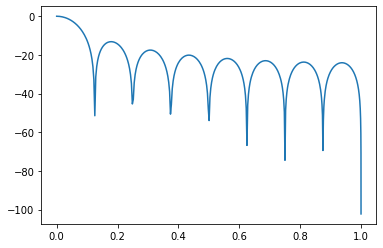

In [81]:
import numpy as np
import seaborn as sns

class AntennaArray(object):
    def __init__(self, nx, ny, dx, dy, theta_res, phi_res):
        self.nx, self.ny = nx, ny
        self.dx, self.dy = dx, dy
        self.theta_res = theta_res
        self.phi_res = phi_res
        self._init_amplitudes()
        self._build_mesh()
        
    def _build_mesh(self):
        self.theta, self.phi, *_ = np.meshgrid(
            # these first two build the actual grid 
            # of angles that we'll move through
            np.arange(-np.pi/2, np.pi/2, np.pi/self.theta_res),
            np.arange(0, 2*np.pi, 2*np.pi/self.phi_res),
            # these two then make sure we have an
            # angle grid to evaluable for each 
            # element in our array
            np.arange(1, self.nx+1, 1),
            np.arange(1, self.ny+1, 1),
        )
        self.m, self.n = np.meshgrid(
            np.arange(1, self.nx+1, 1),
            np.arange(1, self.ny+1, 1),
        )
        
    def get_power(self, wavelength, theta, phi):
        # we get the vector shift
        du = np.sin(self.theta)*np.cos(self.phi) - np.sin(theta)*np.cos(phi)
        dv = np.sin(self.theta)*np.sin(self.phi) - np.sin(theta)*np.sin(phi)
        coef = 2j * np.pi / wavelength
        per_element = self.a * np.exp(coef * (self.m*self.dx*du + self.n*self.dy*dv))
        # sum over the last axes to sum over our elements
        gridded = np.sum(per_element, axis=(2, 3))
        return np.real(gridded * np.conjugate(gridded))
    
    def _init_amplitudes(self):
        self.a = np.ones((self.nx, self.ny))

antenna = AntennaArray(16, 1, 1, 1, 1000, 100)
power = antenna.get_power(2, 0, 0)
theta = antenna.theta[:,:,0,0]
theta = theta.reshape(theta.shape[0] * theta.shape[1])
phi = antenna.phi[:,:,0,0]
phi = phi.reshape(phi.shape[0] * phi.shape[1])
power = power.reshape(power.shape[0] * power.shape[1])
power = power[(phi == 0) & (theta >= 0)]
theta = theta[(phi == 0) & (theta >= 0)]
sns.lineplot(x=np.sin(theta), y=10*np.log10(power/np.max(power)));